# Data Report

### Video
(The 360º video was exported as two 150º videos, containing half the room each. 
Folders video1 and video 2 contain the data related to each of the two videos.)

output_video1.csv contains FER data from video1\
output_video2.csv contains FER data from video2


In [3]:
import pandas as pd

video_file1 = 'output_video1.csv'
video_file2 = 'output_video2.csv'
df1 = pd.read_csv(video_file1)
df2 = pd.read_csv(video_file2)


Total Emotion Count

In [7]:
emotion_counts1 = df1['Emotion'].value_counts()
emotion_counts2 = df2['Emotion'].value_counts()

total = emotion_counts1.add(emotion_counts2, fill_value=0)
print(total)

Emotion
Angry       28295
Disgust     52440
Fear        49490
Happy       48244
Neutral     38759
Sad         71943
Surprise    90933
Name: count, dtype: int64


#### Text 
text_output.txt contains the transcription of all the speech

In [9]:
from collections import Counter
import re

with open('text_output.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()


Average Sentence Length

In [10]:
total_sentences = len(lines)
total_words = 0
word_counter = Counter()

for line in lines:
    line = line.strip()
    words = re.findall(r'\b\w+\b', line.lower())
    total_words += len(words)
    word_counter.update(words)


average_sentence_length = total_words / total_sentences if total_sentences else 0
print(f"Average sentence length: {average_sentence_length:.2f} words")


Average sentence length: 6.96 words


Total Sentences and Words

In [12]:
print(f"Total number of sentences: {total_sentences}")
print(f"Total number of words: {total_words}")

Total number of sentences: 1149
Total number of words: 8000


Unique Words

In [15]:
unique_words = len(word_counter)
print(f"Number of unique words: {unique_words}")

Number of unique words: 1100


Most Common Words

In [13]:
most_common_words = word_counter.most_common(10)
print("Most common words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Number of unique words: 1100
Most common words:
you: 432
the: 305
i: 242
so: 226
to: 212
it: 198
s: 175
a: 171
and: 169
that: 158


#### Labels
labels.csv contains the annotated data from the experiment

In [18]:
label_file = 'labels.csv'
df = pd.read_csv(label_file)

display(df)

,timestamp,label
0,64144.230985,Session Started
1,64162.648001,Exposition
2,64294.927295,Discussion
3,64617.311922,Exposition
4,64655.609163,Discussion
5,64730.305357,Exposition
6,64879.644655,Exploration
7,64899.649972,Exposition
8,64942.053825,Discussion
9,64965.106910,Exploration


## Statistics

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

csv_file = 'outputVideos.csv'
df = pd.read_csv(csv_file)

df.head()

,Frame Number,X,Y,Width,Height,Emotion
0,1.0,844,366,86,86,Angry
1,1.0,892,371,89,89,Fear
2,1.0,341,294,141,141,Sad
3,1.0,1594,382,103,103,Happy
4,1.0,741,268,128,128,Fear


Percentage of emotions

In [24]:
emotion_percentages = df['Emotion'].value_counts(normalize=True) * 100
emotion_stats = pd.DataFrame({'Percentage': emotion_percentages})

display(emotion_stats)

,Percentage
Emotion,
Surprise,23.923189
Sad,18.927188
Disgust,13.796224
Fear,13.020121
Happy,12.692316
Neutral,10.196946
Angry,7.444015


Emotion Averages

In [25]:
emotion_frame_stats = df.groupby('Emotion')['Frame Number'].agg(['mean', 'median'])
emotion_modes = df.groupby('Emotion')['Frame Number'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
emotion_frame_stats['mode'] = emotion_modes

display(emotion_frame_stats)

,mean,median,mode
Emotion,,,
Angry,27183.530341,28496.0,1505.0
Disgust,24080.964703,22972.5,385.0
Fear,24322.428652,24005.0,2914.0
Happy,22441.534015,18510.5,4221.0
Neutral,25158.714389,26326.0,13676.0
Sad,21684.656965,17570.0,13088.0
Surprise,23318.964798,21734.0,4619.0


Overall emotion distribution

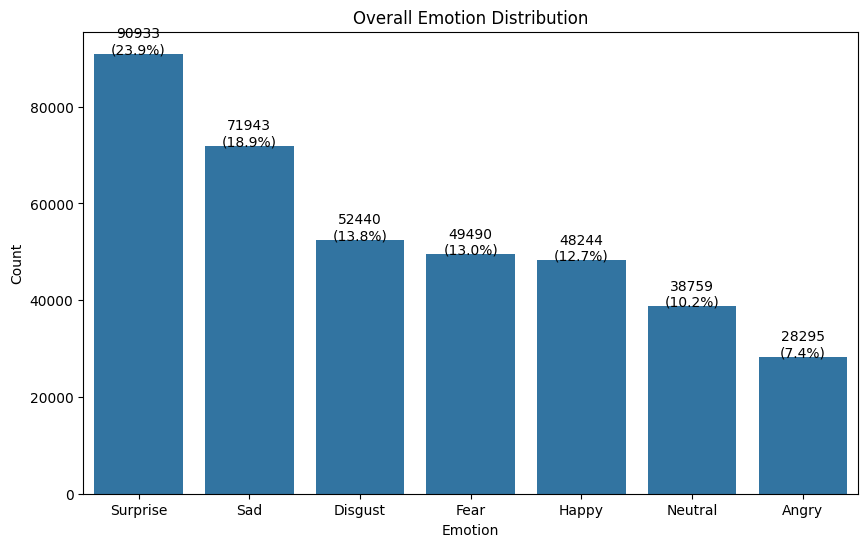

In [26]:
def plot_overall_emotion_distribution(df):
    emotion_counts = df['Emotion'].value_counts()
    emotion_percentages = df['Emotion'].value_counts(normalize=True) * 100

    fig, ax1 = plt.subplots(figsize=(10, 6))

    sns.barplot(x=emotion_counts.index, y=emotion_counts.values, ax=ax1)
    ax1.set_title('Overall Emotion Distribution')
    ax1.set_xlabel('Emotion')
    ax1.set_ylabel('Count')

    for i, count in enumerate(emotion_counts.values):
        ax1.text(i, count + 5, f'{count}\n({emotion_percentages.values[i]:.1f}%)', ha='center')

    plt.show()

plot_overall_emotion_distribution(df)

Emotion distribution per frame

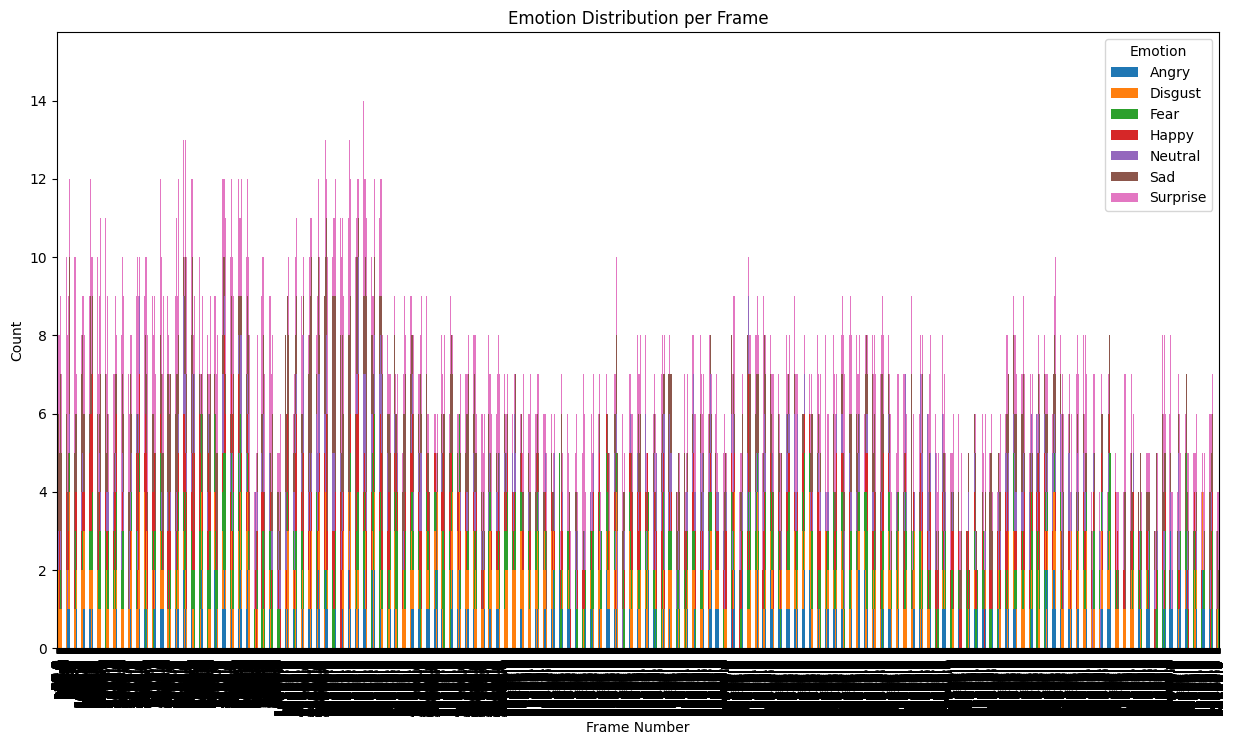

In [27]:
def plot_emotion_distribution_per_frame(df):
    emotion_frame = pd.crosstab(df['Frame Number'], df['Emotion'])

    emotion_frame.plot(kind='bar', stacked=True, figsize=(15, 8))
    plt.title('Emotion Distribution per Frame')
    plt.xlabel('Frame Number')
    plt.ylabel('Count')
    plt.legend(title='Emotion')
    plt.show()

plot_emotion_distribution_per_frame(df)


Distribution of emotions by position

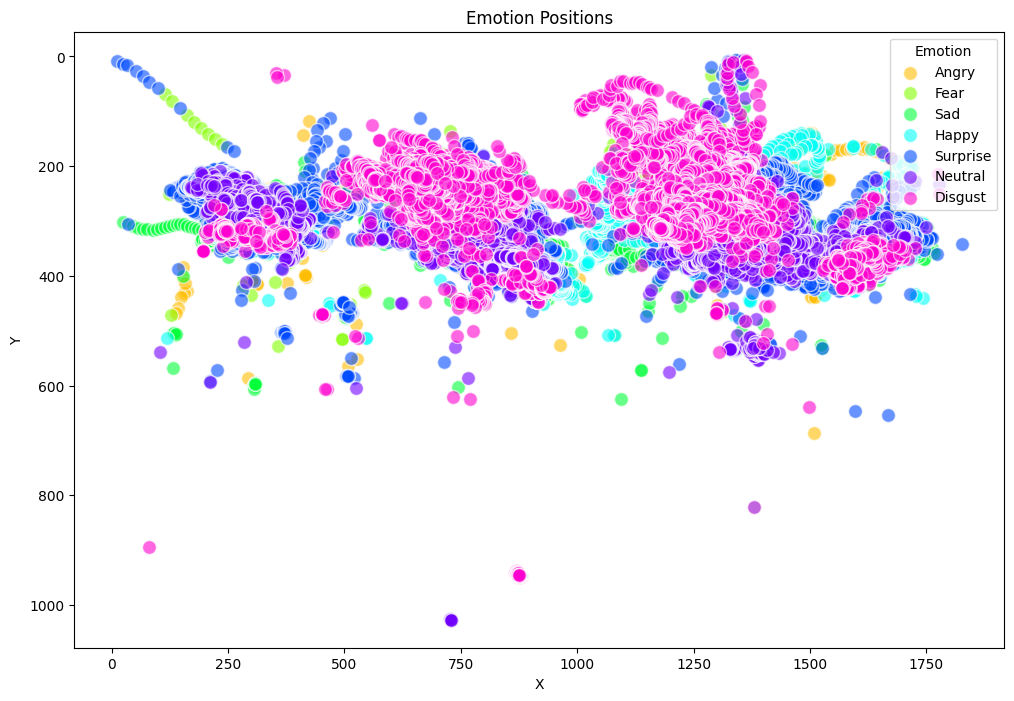

In [28]:
def plot_emotions_by_position(df):
    unique_emotions = df['Emotion'].unique()
    palette = sns.color_palette("hsv", len(unique_emotions))
    emotion_colors = dict(zip(unique_emotions, palette))

    plt.figure(figsize=(12, 8))
    
    for emotion in unique_emotions:
        emotion_data = df[df['Emotion'] == emotion]
        plt.scatter(emotion_data['X'], emotion_data['Y'], c=[emotion_colors[emotion]], label=emotion, alpha=0.6, edgecolors='w', s=100)
    
    plt.gca().invert_yaxis()
    plt.title('Emotion Positions')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(title='Emotion', loc='upper right')
    plt.show()

plot_emotions_by_position(df)

Heatmap of Emotion Density

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


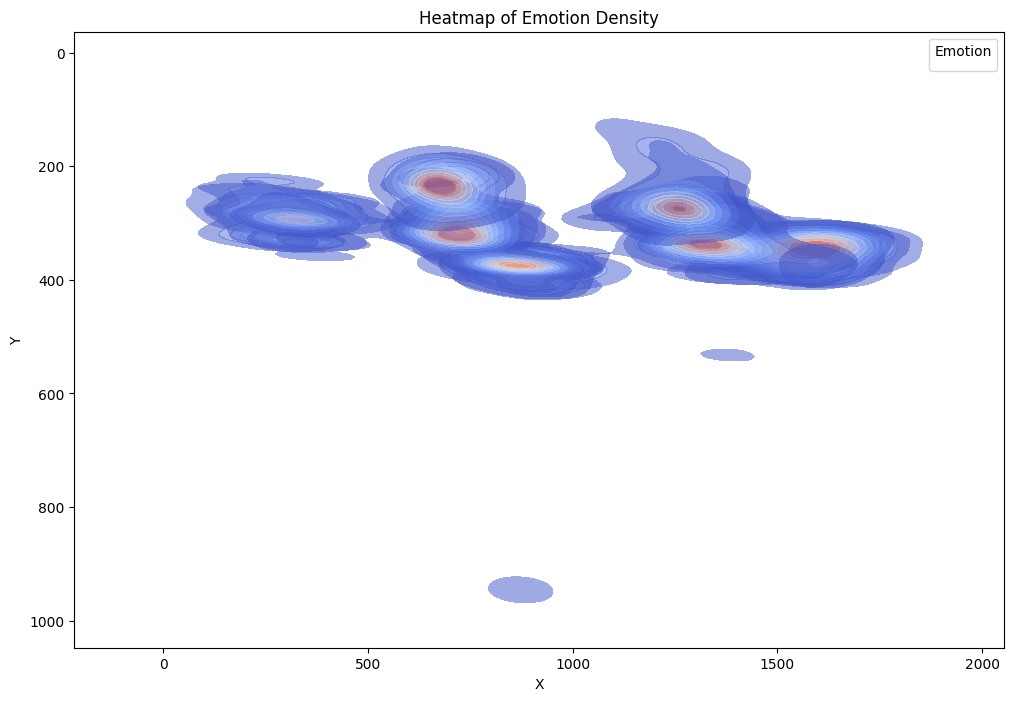

In [29]:
def plot_emotion_density_heatmap(df):
    plt.figure(figsize=(12, 8))
    
    for emotion in df['Emotion'].unique():
        emotion_data = df[df['Emotion'] == emotion]
        sns.kdeplot(x=emotion_data['X'], y=emotion_data['Y'], cmap='coolwarm', fill=True, label=emotion, alpha=0.5)
    
    plt.gca().invert_yaxis()
    plt.title('Heatmap of Emotion Density')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(title='Emotion')
    plt.show()

plot_emotion_density_heatmap(df)

Timeline of Emotions

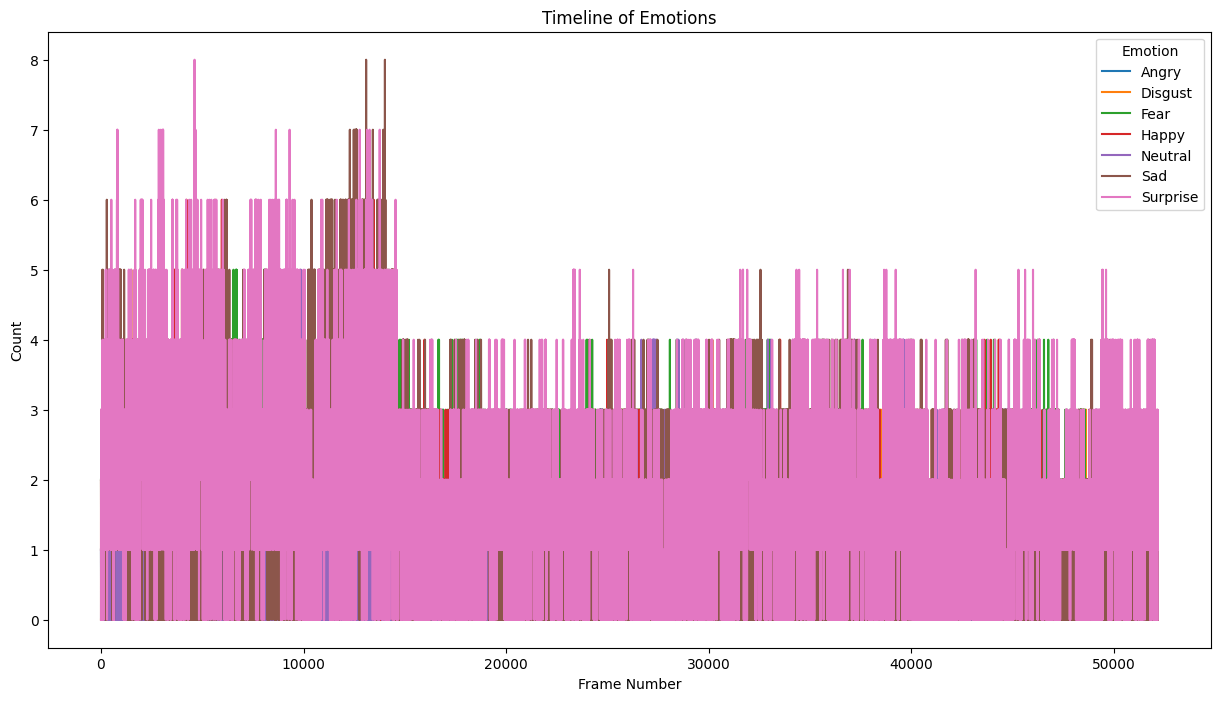

In [30]:
def plot_emotion_timeline(df):
    plt.figure(figsize=(15, 8))
    
    emotion_trends = df.groupby(['Frame Number', 'Emotion']).size().unstack(fill_value=0)
    emotion_trends.plot(kind='line', ax=plt.gca())
    
    plt.title('Timeline of Emotions')
    plt.xlabel('Frame Number')
    plt.ylabel('Count')
    plt.legend(title='Emotion')
    plt.show()

plot_emotion_timeline(df)

Histogram of Emotions per Frame

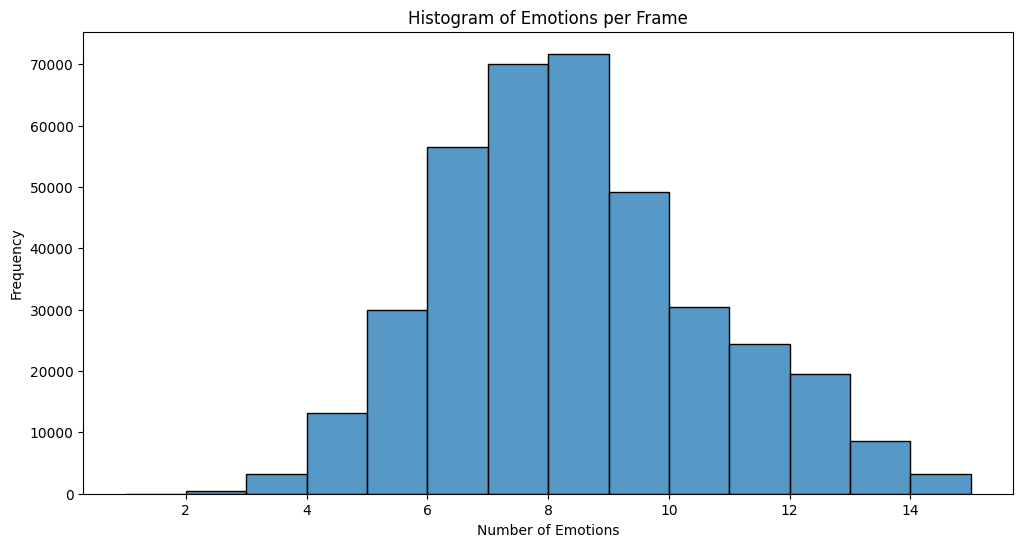

In [31]:
def plot_emotions_per_frame_histogram(df):
    df['Emotions_Per_Frame'] = df.groupby('Frame Number')['Emotion'].transform('count')
    
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Emotions_Per_Frame'], bins=range(1, df['Emotions_Per_Frame'].max() + 1), kde=False)
    
    plt.title('Histogram of Emotions per Frame')
    plt.xlabel('Number of Emotions')
    plt.ylabel('Frequency')
    plt.show()

plot_emotions_per_frame_histogram(df)